In [15]:
import os
import glob
import numpy as np
import pandas as pd
import random
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from keras import backend as K
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import decode_predictions

In [17]:
DATASET_PATH = 'data'

IMG_SIZE = 299
RANDOM_SEED = 42
RANDOM_SEED_ = '42'

In [18]:
os.environ['PYTHONHASHSEED'] = RANDOM_SEED_
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.set_random_seed(RANDOM_SEED)

In [19]:
sorted(glob.glob(DATASET_PATH + "/*.jpg"))

['data/0.jpg',
 'data/1.jpg',
 'data/2.jpg',
 'data/_0.jpg',
 'data/_1.jpg',
 'data/_2.jpg']

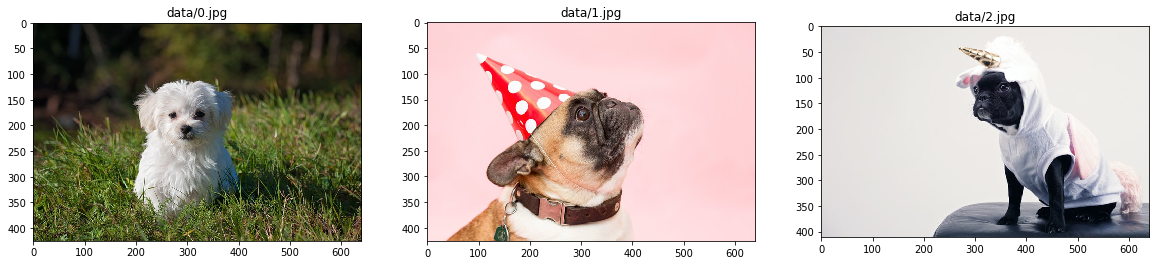

In [92]:
fig = plt.figure(1, figsize=(20, 20))
imgs_path = sorted(glob.glob(DATASET_PATH + "/?.jpg"))

for n, img_path in enumerate(imgs_path):
    img = Image.open(img_path)
    ax = fig.add_subplot(1, 3, n+1)
    ax.set_title(img_path)
    plt.imshow(img)

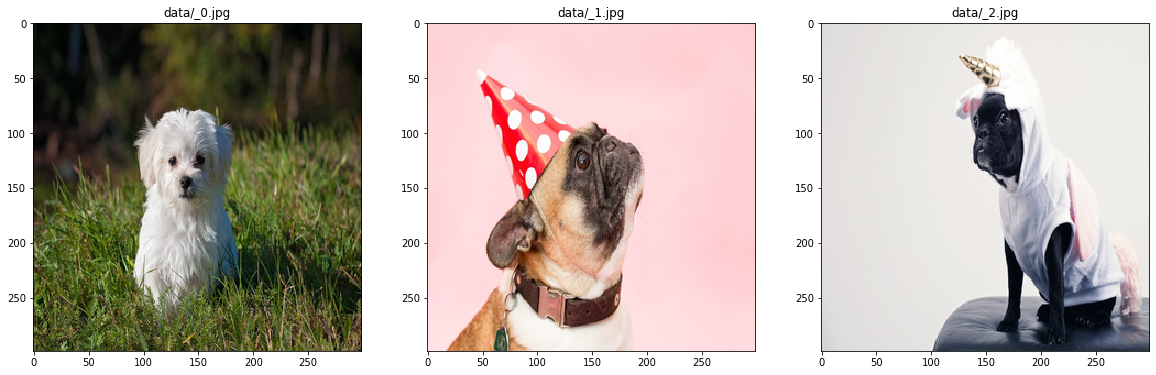

In [90]:
fig = plt.figure(1, figsize=(20, 20))
imgs_path = sorted(glob.glob(DATASET_PATH + "/?.jpg"))

for n, img_path in enumerate(imgs_path):
    img = Image.open(img_path)
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    target_path = DATASET_PATH + "/_" + str(n) + ".jpg"
    img.save(target_path, "JPEG")
    ax = fig.add_subplot(1, 3, n+1)
    ax.set_title(target_path)
    plt.imshow(img)

In [23]:
model = InceptionV3(include_top=True, weights='imagenet', input_shape=((IMG_SIZE, IMG_SIZE, 3)))

Instructions for updating:
Colocations handled automatically by placer.


In [174]:
IMAGE_NAME = "_0.jpg"
CLASS_NUM = 153
#IMAGE_NAME = "_1.jpg"
#CLASS_NUM = 254
#IMAGE_NAME = "_2.jpg"
#CLASS_NUM = 254
#IMAGE_NAME = "_0.jpg"
#CLASS_NUM = 934
#IMAGE_NAME = "_1.jpg"
#CLASS_NUM = 934
#IMAGE_NAME = "_2.jpg"
#CLASS_NUM = 934

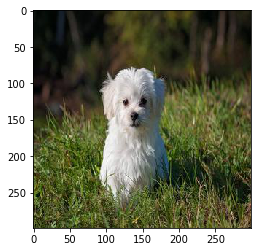

In [175]:
img = Image.open(DATASET_PATH + "/" + IMAGE_NAME)
img = np.asarray(img) / 255.
plt.imshow(img)
plt.show()

In [125]:
pred = model.predict(img.reshape((1, IMG_SIZE, IMG_SIZE, 3)))
pred_names = decode_predictions(pred)
print(pred[0][CLASS_NUM])
pred_names

0.79329985


[[('n02110958', 'pug', 0.79329985),
  ('n02108915', 'French_bulldog', 0.028114915),
  ('n02112706', 'Brabancon_griffon', 0.022548214),
  ('n02108089', 'boxer', 0.019370608),
  ('n02096585', 'Boston_bull', 0.010940507)]]

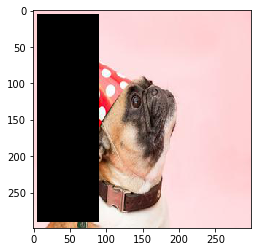

In [126]:
img = Image.open(DATASET_PATH + "/" + IMAGE_NAME)
draw = ImageDraw.Draw(img)
draw.rectangle([(5, 5), (90, 290)], fill = "black")
plt.imshow(img)
plt.show()

In [127]:
img = np.asarray(img) / 255.
img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))
pred = model.predict(img)
pred_names = decode_predictions(pred)
print(pred[0][CLASS_NUM])
pred_names

0.9787457


[[('n02110958', 'pug', 0.9787457),
  ('n02108915', 'French_bulldog', 0.0042673736),
  ('n02112706', 'Brabancon_griffon', 0.0034448393),
  ('n02096585', 'Boston_bull', 0.001459693),
  ('n02108422', 'bull_mastiff', 0.0002655092)]]

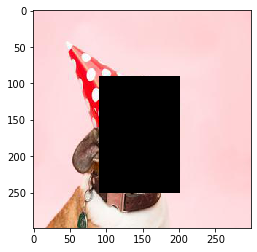

In [128]:
img = Image.open(DATASET_PATH + "/" + IMAGE_NAME)
draw = ImageDraw.Draw(img)
draw.rectangle([(90, 90), (200, 250)], fill = "black")
plt.imshow(img)
plt.show()

In [129]:
img = np.asarray(img) / 255.
img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))
pred = model.predict(img)
pred_names = decode_predictions(pred)
print(pred[0][CLASS_NUM])
pred_names

0.0013192903


[[('n03787032', 'mortarboard', 0.44069842),
  ('n04548362', 'wallet', 0.045387685),
  ('n02669723', 'academic_gown', 0.030061489),
  ('n03916031', 'perfume', 0.024288023),
  ('n03026506', 'Christmas_stocking', 0.023068933)]]

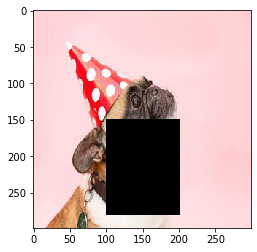

In [130]:
img = Image.open(DATASET_PATH + "/" + IMAGE_NAME)
draw = ImageDraw.Draw(img)
draw.rectangle([(100, 150), (200, 280)], fill = "black")
plt.imshow(img)
plt.show()

In [131]:
img = np.asarray(img) / 255.
img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))
pred = model.predict(img)
pred_names = decode_predictions(pred)
print(pred[0][CLASS_NUM])
pred_names

0.0024811286


[[('n02869837', 'bonnet', 0.13272117),
  ('n03944341', 'pinwheel', 0.090144716),
  ('n04399382', 'teddy', 0.041953865),
  ('n02281787', 'lycaenid', 0.041006614),
  ('n03291819', 'envelope', 0.0169998)]]

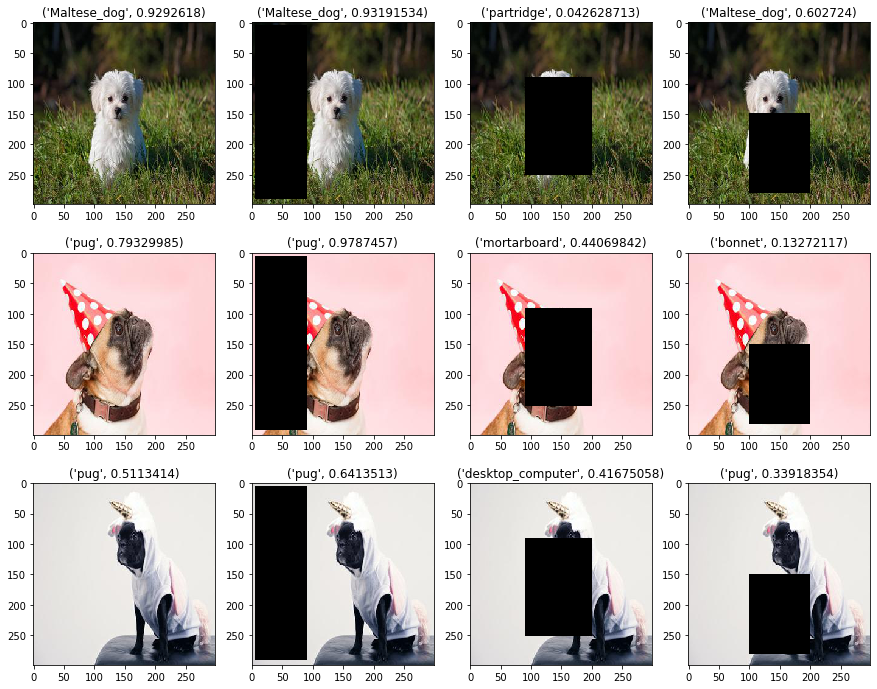

In [161]:
fig = plt.figure(1, figsize=(15, 12))
imgs_path = sorted(glob.glob(DATASET_PATH + "/_?.jpg"))

for k, img_path in enumerate(imgs_path):
    img = Image.open(img_path)
    img = np.asarray(img) / 255.
    pred = model.predict(img.reshape((1, IMG_SIZE, IMG_SIZE, 3)))
    pred_names = decode_predictions(pred)
    ax = fig.add_subplot(3, 4, (k*4)+1)
    ax.set_title((pred_names[0][0][1], pred_names[0][0][2]))
    plt.imshow(img)
    
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    draw.rectangle([(5, 5), (90, 290)], fill = "black")
    img = np.asarray(img) / 255.
    pred = model.predict(img.reshape((1, IMG_SIZE, IMG_SIZE, 3)))
    pred_names = decode_predictions(pred)
    ax = fig.add_subplot(3, 4, (k*4)+2)
    ax.set_title((pred_names[0][0][1], pred_names[0][0][2]))
    plt.imshow(img)
    
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    draw.rectangle([(90, 90), (200, 250)], fill = "black")
    img = np.asarray(img) / 255.
    pred = model.predict(img.reshape((1, IMG_SIZE, IMG_SIZE, 3)))
    pred_names = decode_predictions(pred)
    ax = fig.add_subplot(3, 4, (k*4)+3)
    ax.set_title((pred_names[0][0][1], pred_names[0][0][2]))
    plt.imshow(img)
    
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    draw.rectangle([(100, 150), (200, 280)], fill = "black")
    img = np.asarray(img) / 255.
    pred = model.predict(img.reshape((1, IMG_SIZE, IMG_SIZE, 3)))
    pred_names = decode_predictions(pred)
    ax = fig.add_subplot(3, 4, (k*4)+4)
    ax.set_title((pred_names[0][0][1], pred_names[0][0][2]))
    plt.imshow(img)

In [ ]:
!mkdir data/result

-22.83818851054457 102.77756437862081


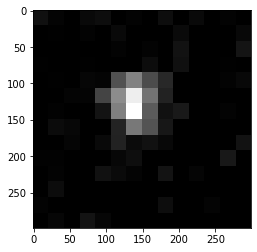

In [202]:
acc = np.zeros(IMG_SIZE*IMG_SIZE*3).reshape(IMG_SIZE,IMG_SIZE,3)
for n in range(5000):
    THRESHOLD_COEF = 0.5
    IMG_SIZE_SMALL = int(IMG_SIZE*0.05)
    rand_ar = np.ones(IMG_SIZE_SMALL*IMG_SIZE_SMALL, np.uint8)
    rand_ar[0:int(IMG_SIZE_SMALL*IMG_SIZE_SMALL*THRESHOLD_COEF)] = 0
    random.shuffle(rand_ar)
    rand_ar = rand_ar.reshape(IMG_SIZE_SMALL, IMG_SIZE_SMALL)
    rand_ar = Image.fromarray(np.uint8(rand_ar))
    rand_ar = rand_ar.resize((IMG_SIZE, IMG_SIZE), Image.NEAREST)
    rand_ar = np.stack((rand_ar,rand_ar,rand_ar), axis=2)

    img = Image.open(DATASET_PATH + "/" + IMAGE_NAME)
    img = img * rand_ar

    img = np.asarray(img) / 255.
    img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))
    pred = model.predict(img)
    pred_names = decode_predictions(pred)

    rand_ar = rand_ar.astype(np.int8)
    acc = acc + rand_ar * pred[0][CLASS_NUM]
    acc = acc + (rand_ar - 1) * pred[0][CLASS_NUM] # THRESHOLD_COEF = 0.4:0.7
    ##acc = acc + (rand_ar - 1) * (1 - pred[0][CLASS_NUM]) # THRESHOLD_COEF = 0.25
    if (n % 10 == 0):
        out_ = np.clip(acc, 0, np.max(acc))
        out_ = out_ / np.max(out_)
        out_ = out_ * 255
        out_ = Image.fromarray(out_.astype('uint8'), 'RGB')
        out_.save('data/result/out_{0:04}.bmp'.format(n))

print(np.min(acc), np.max(acc))
#acc = (acc - np.min(acc)) / (np.max(acc) - np.min(acc))
acc = np.clip(acc, 0, np.max(acc))
acc = acc / np.max(acc)
#acc[acc<0.3] = 0
plt.imshow(acc)
plt.show()

In [209]:
!ffmpeg -f image2 -i data/result/out_%3d0.bmp -pix_fmt rgb24 data/out.gif

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

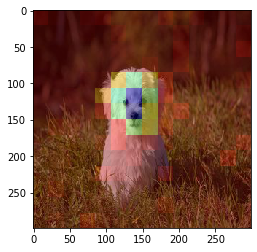

In [210]:
img = Image.open(DATASET_PATH + "/" + IMAGE_NAME)
img = np.uint8(img)
heatmap = np.uint8(acc[:,:,0] * 255)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
alf = 0.4
result_img = (heatmap * alf + img * (1-alf))/255
plt.imshow(result_img)
plt.show()

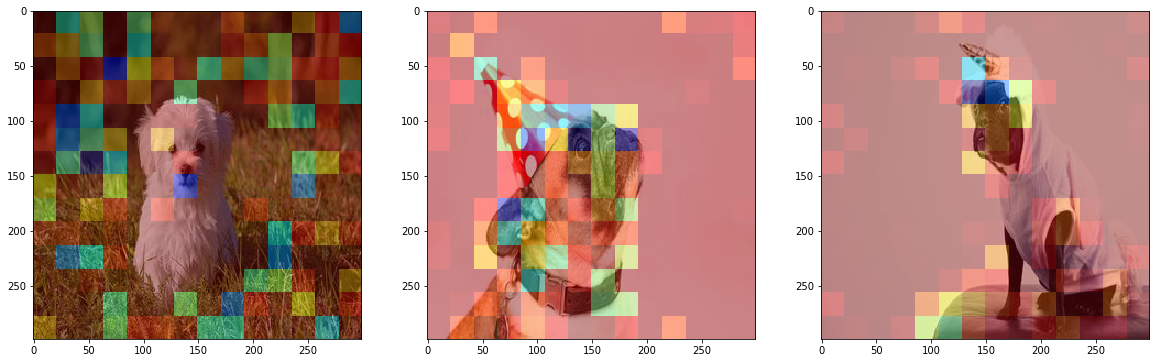

In [225]:
CLASS_NUM = {0: 153, 1: 254, 2: 192, 'maltese': 153, 'pug': 254, 'hotdog': 934, 'icecream': 928}
fig = plt.figure(1, figsize=(20, 20))
imgs_path = sorted(glob.glob(DATASET_PATH + "/_?.jpg"))

for k, img_path in enumerate(imgs_path):
    img_orinig = Image.open(img_path)
    img = np.asarray(img_orinig) / 255.
    target_path = DATASET_PATH + "/_" + str(n) + ".jpg"
    pred = model.predict(img.reshape((1, IMG_SIZE, IMG_SIZE, 3)))
    pred_names = decode_predictions(pred)
    
    acc = np.zeros(IMG_SIZE*IMG_SIZE*3).reshape(IMG_SIZE,IMG_SIZE,3)
    for n in range(10000):
        THRESHOLD_COEF = 0.5
        IMG_SIZE_SMALL = int(IMG_SIZE*0.05)
        rand_ar = np.ones(IMG_SIZE_SMALL*IMG_SIZE_SMALL, np.uint8)
        rand_ar[0:int(IMG_SIZE_SMALL*IMG_SIZE_SMALL*THRESHOLD_COEF)] = 0
        random.shuffle(rand_ar)
        rand_ar = rand_ar.reshape(IMG_SIZE_SMALL, IMG_SIZE_SMALL)
        rand_ar = Image.fromarray(np.uint8(rand_ar))
        rand_ar = rand_ar.resize((IMG_SIZE, IMG_SIZE), Image.NEAREST)
        rand_ar = np.stack((rand_ar,rand_ar,rand_ar), axis=2)

        img = img_orinig
        img = img * rand_ar

        img = np.asarray(img) / 255.
        img = img.reshape((1, IMG_SIZE, IMG_SIZE, 3))
        pred = model.predict(img)
        pred_names = decode_predictions(pred)

        rand_ar = rand_ar.astype(np.int8)
        acc = acc + rand_ar * pred[0][CLASS_NUM[k]]
        acc = acc + (rand_ar - 1) * pred[0][CLASS_NUM['icecream']]

    acc = np.clip(acc, 0, np.max(acc))
    acc = acc / np.max(acc)
    
    img = img_orinig
    img = np.uint8(img)
    heatmap = np.uint8(acc[:,:,0] * 255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    alf = 0.4
    result_img = (heatmap * alf + img * (1-alf))/255
    
    ax = fig.add_subplot(1, 3, k+1)
    plt.imshow(result_img)